<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 8.2 MB/s 


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.5 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751265 sha256=a2bb9578b56d6564902e32e0ccd7ed13c837f2919723102aed953ec04f3495db
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import pyupbit

In [111]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-btc", interval="minute60")
df

,open,high,low,close,volume,value
2023-03-13 10:00:00,29770000.0,29798000.0,29544000.0,29628000.0,518.304415,1.536998e+10
2023-03-13 11:00:00,29628000.0,29674000.0,29199000.0,29256000.0,463.594904,1.363887e+10
2023-03-13 12:00:00,29256000.0,29365000.0,29112000.0,29334000.0,376.945669,1.103644e+10
2023-03-13 13:00:00,29334000.0,29593000.0,29318000.0,29463000.0,299.831733,8.836867e+09
2023-03-13 14:00:00,29463000.0,29566000.0,29452000.0,29566000.0,181.410317,5.352923e+09
...,...,...,...,...,...,...
2023-03-21 13:00:00,37106000.0,37392000.0,37106000.0,37331000.0,203.820800,7.599761e+09
2023-03-21 14:00:00,37331000.0,37367000.0,37200000.0,37220000.0,220.940902,8.233977e+09
2023-03-21 15:00:00,37225000.0,37237000.0,37087000.0,37169000.0,352.227938,1.308608e+10
2023-03-21 16:00:00,37169000.0,37263000.0,36800000.0,36914000.0,1002.594157,3.707824e+10


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-02-01 11:00:00,27160.0
1,2023-02-01 11:30:00,27190.0
2,2023-02-01 12:00:00,27030.0
3,2023-02-01 12:30:00,27050.0
4,2023-02-01 13:00:00,27080.0
...,...,...
195,2023-02-05 12:30:00,30010.0
196,2023-02-05 13:00:00,29910.0
197,2023-02-05 13:30:00,30020.0
198,2023-02-05 14:00:00,30030.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

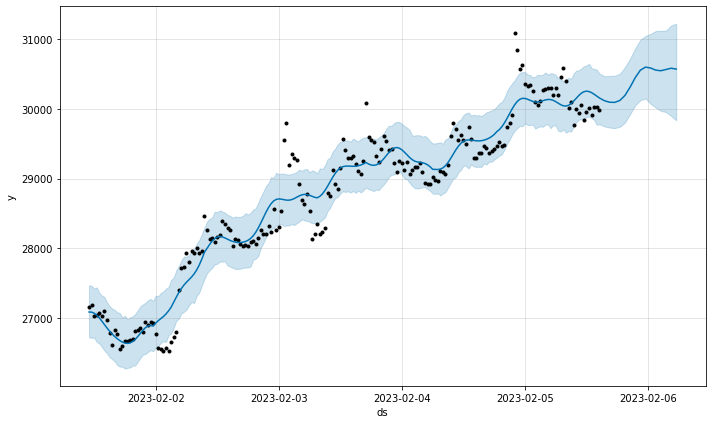

In [ ]:
#그래프1
fig1 = model.plot(forecast)

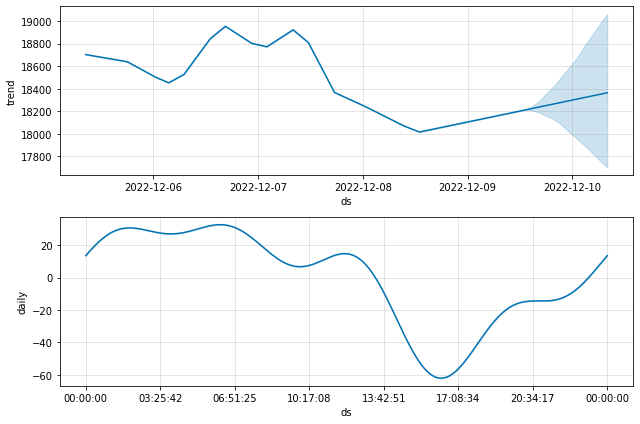

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)